In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.shape

(1000, 3)

In [5]:
df.isnull().sum().any()

False

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

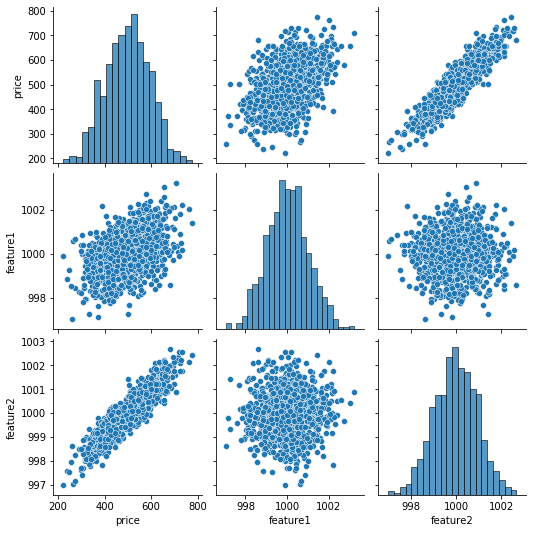

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[["feature1","feature2"]].values #array istiyor

In [11]:
y = df["price"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(700, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train.max()

1.0

In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.0.0'

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Activation

In [24]:
model = Sequential()

In [25]:
model.add(Dense(4,activation = "relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))

In [26]:
model.compile(optimizer = "rmsprop", loss="mse")

In [27]:
model.fit(X_train,y_train,batch_size=32,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256718.7154
Epoch 2/250
700/700 [==============================] - 0s 53us/sample - loss: 256663.1769
Epoch 3/250
700/700 [==============================] - 0s 51us/sample - loss: 256605.3295
Epoch 4/250
700/700 [==============================] - 0s 50us/sample - loss: 256541.3323
Epoch 5/250
700/700 [==============================] - 0s 53us/sample - loss: 256472.8659
Epoch 6/250
700/700 [==============================] - 0s 51us/sample - loss: 256397.9533
Epoch 7/250
700/700 [==============================] - 0s 50us/sample - loss: 256315.1443
Epoch 8/250
700/700 [==============================] - 0s 50us/sample - loss: 256223.9713
Epoch 9/250
700/700 [==============================] - 0s 56us/sample - loss: 256122.6513
Epoch 10/250
700/700 [==============================] - 0s 51us/sample - loss: 256011.3945
Epoch 11/250
700/700 [==============================] - 0s 56us/sample - loss: 

700/700 [==============================] - 0s 49us/sample - loss: 131969.5212
Epoch 91/250
700/700 [==============================] - 0s 47us/sample - loss: 128187.5612
Epoch 92/250
700/700 [==============================] - 0s 48us/sample - loss: 124371.9216
Epoch 93/250
700/700 [==============================] - 0s 46us/sample - loss: 120527.5467
Epoch 94/250
700/700 [==============================] - 0s 46us/sample - loss: 116624.7445
Epoch 95/250
700/700 [==============================] - 0s 49us/sample - loss: 112712.9542
Epoch 96/250
700/700 [==============================] - 0s 46us/sample - loss: 108774.2668
Epoch 97/250
700/700 [==============================] - 0s 48us/sample - loss: 104795.8107
Epoch 98/250
700/700 [==============================] - 0s 47us/sample - loss: 100783.9400
Epoch 99/250
700/700 [==============================] - 0s 46us/sample - loss: 96773.1125
Epoch 100/250
700/700 [==============================] - 0s 48us/sample - loss: 92744.7957
Epoch 101/250

Epoch 181/250
700/700 [==============================] - 0s 47us/sample - loss: 814.7201
Epoch 182/250
700/700 [==============================] - 0s 49us/sample - loss: 799.1288
Epoch 183/250
700/700 [==============================] - 0s 46us/sample - loss: 783.1103
Epoch 184/250
700/700 [==============================] - 0s 47us/sample - loss: 766.7888
Epoch 185/250
700/700 [==============================] - 0s 49us/sample - loss: 751.6385
Epoch 186/250
700/700 [==============================] - 0s 47us/sample - loss: 737.7264
Epoch 187/250
700/700 [==============================] - 0s 51us/sample - loss: 723.5978
Epoch 188/250
700/700 [==============================] - 0s 48us/sample - loss: 709.6699
Epoch 189/250
700/700 [==============================] - 0s 47us/sample - loss: 694.5691
Epoch 190/250
700/700 [==============================] - 0s 51us/sample - loss: 681.5512
Epoch 191/250
700/700 [==============================] - 0s 47us/sample - loss: 666.0023
Epoch 192/250
700/700

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12        
_________________________________________________________________
dense_1 (Dense)              multiple                  20        
_________________________________________________________________
dense_2 (Dense)              multiple                  20        
_________________________________________________________________
dense_3 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


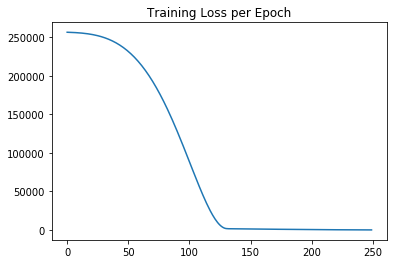

In [29]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [30]:
loss_df=pd.DataFrame(model.history.history)
loss_df.loss.idxmin()

249

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [32]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [33]:
y_pred = model.predict(X_test)

In [34]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [35]:
compare.head(5)

,Actual,Pred
0,402.296319,415.962677
1,624.156198,614.511414
2,582.455066,585.206177
3,578.588606,569.502258
4,371.224104,383.979736


In [36]:
eval_metrics(y_test,y_pred)

r2_score: 0.9884811197362506 
 mae: 8.21211424539381 
 mse: 101.2743600289812 
 rmse: 10.06351628552273


In [37]:
model.evaluate(X_train,y_train, verbose=0)

102.10484732491629

In [38]:
model.evaluate(X_test,y_test, verbose=0)

101.2743495686849

In [39]:
import seaborn as sns

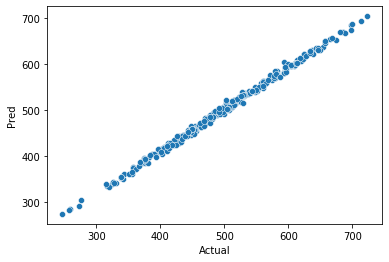

In [40]:
sns.scatterplot(x="Actual",y="Pred",data=compare)

In [41]:
#Making predictions with the model

In [65]:
new_data = [[999,1001]]

In [66]:
scaler.transform(new_data)

array([[0.30608328, 0.71932348]])

In [67]:
model.predict(new_data)[0][0]

665036.0

In [57]:
#Saving and loading the model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save("my_model.h5")

In [73]:
loaded_model=load_model("my_model.h5")

In [74]:
loaded_model.predict(new_data)

ValueError: Please provide model inputs as a list or tuple of 2 or 3 elements: (input, target) or (input, target, sample_weights) Received tf.Tensor([[ 999 1001]], shape=(1, 2), dtype=int32)